In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv('hotel_bookings_data.csv')

# Exploratory data analysis and Data Cleaning

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#we can see that this date column has datatype as object, we will have to change it to datetime datatype
df['reservation_status_date'].head(5)

0    01-07-2015
1    01-07-2015
2    02-07-2015
3    02-07-2015
4    03-07-2015
Name: reservation_status_date, dtype: object

In [9]:
#converting datatype to datetime for COLUMN:reservation_status_date
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'],format='%d-%m-%Y')

In [10]:
df['reservation_status_date'].head(5)

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]

In [11]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
# since we are using it for object datatype columns it wont show mean,std etc.
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
# finding out the unique values in every object datatype columns
for col in df.describe(include ='object').columns:
    print(col)
    print(df[col].unique())
    print('--'*30)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [13]:
#check for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#drop unrelated/blank columns
df.drop(['agent','company'], axis= 1,inplace=True)

In [15]:
#drop null values
df.dropna(inplace=True)

In [16]:
# all null values removed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

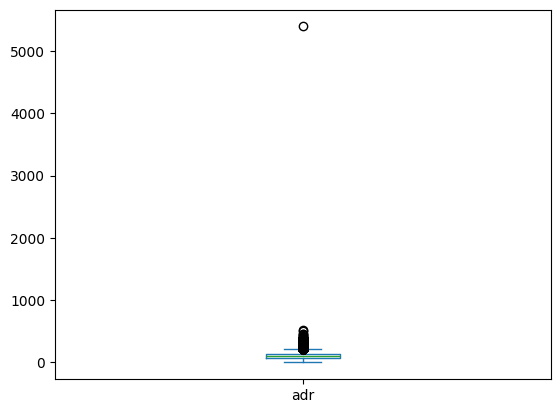

In [18]:
# from above we noticed outliers, plotting one such column to view the outlier
df['adr'].plot(kind = 'box')

In [19]:
# removing the outlier for adr because it is too big and will impact the analysis
df = df[df['adr']<5000]

# Data analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


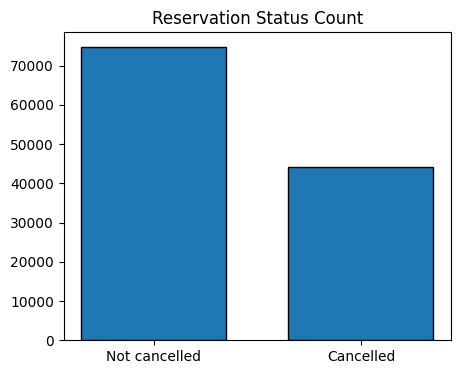

In [20]:
# finding how much percentage of bookings have veen cancelled
cancelled_perc = df['is_canceled'].value_counts(normalize= True)
print(cancelled_perc)

plt.figure(figsize =(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor ='k', width = 0.7)
plt.show()

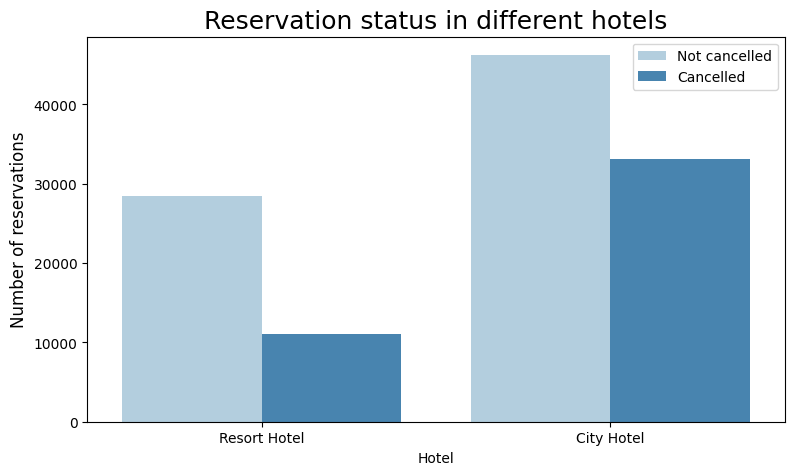

In [21]:
plt.figure(figsize = (9,5))
ax1 = sns.countplot(data = df, x='hotel', hue='is_canceled', palette = 'Blues')

plt.title('Reservation status in different hotels',size=18)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations',size =12)
plt.legend(['Not cancelled','Cancelled'])
plt.show()

In [22]:
# Resort Hotel booking cancellation percentage
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [23]:
# City Hotel booking cancellation percentage
city_hotel = df[df['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [24]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

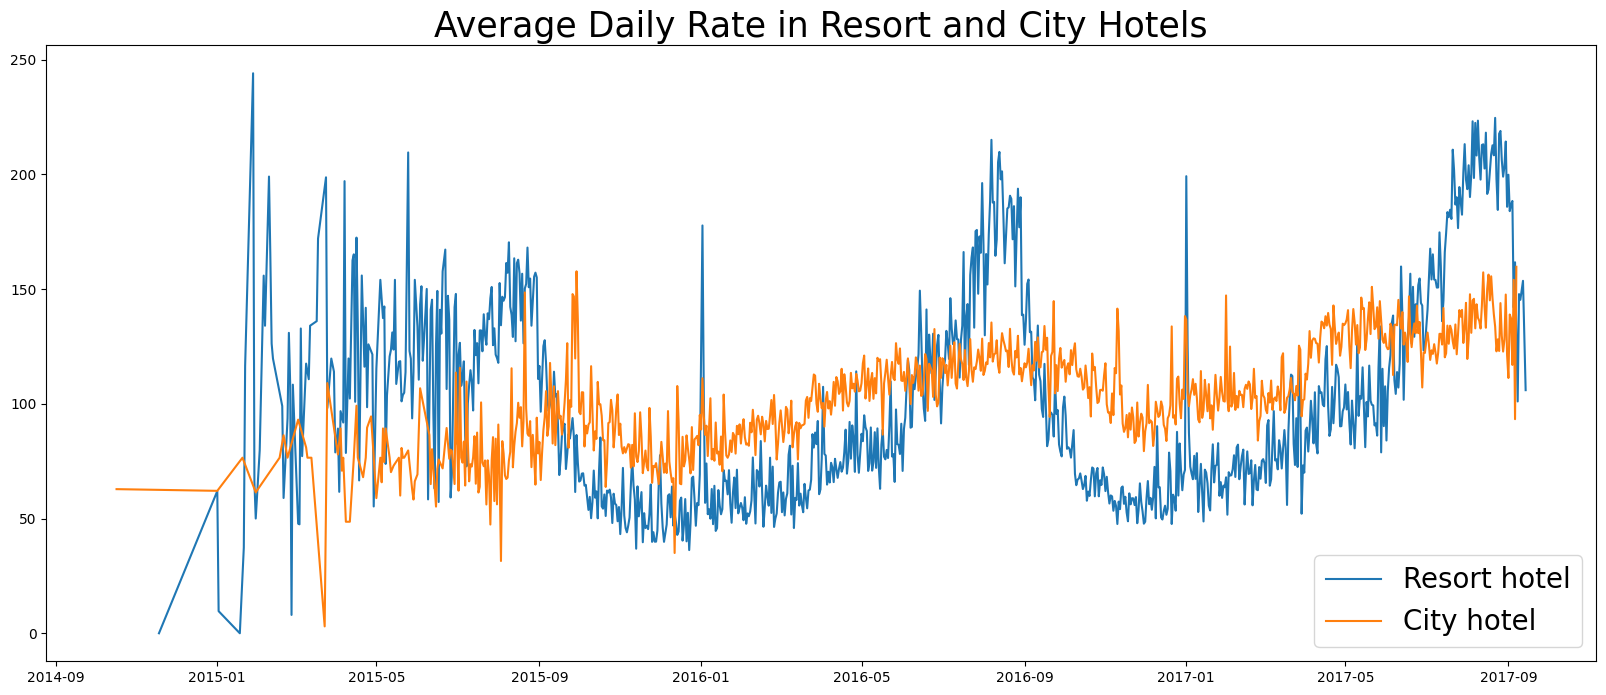

In [25]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in Resort and City Hotels', size=25)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City hotel')
plt.legend(fontsize= 20)
plt.show()

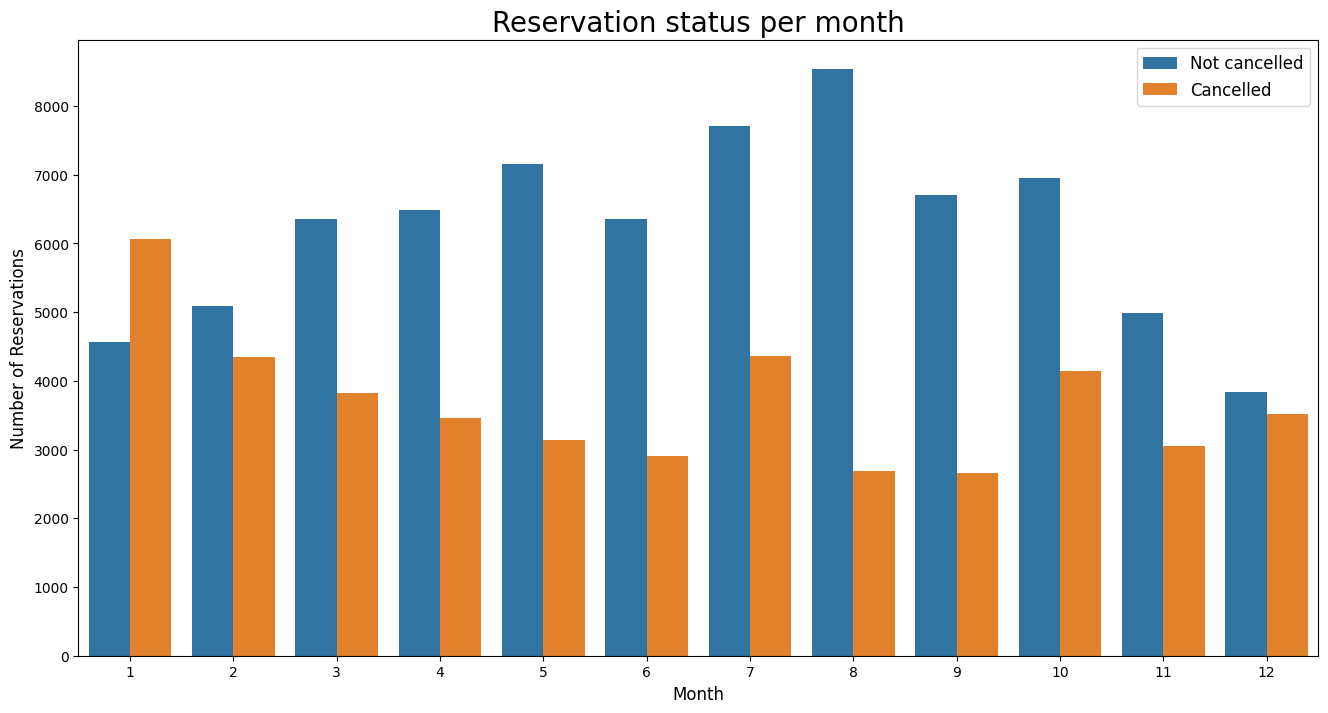

In [26]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month', hue='is_canceled', data=df)
plt.title('Reservation status per month',size=20)
plt.xlabel('Month',size=12)
plt.ylabel('Number of Reservations',size=12)
plt.legend(['Not cancelled','Cancelled'],fontsize= 12)
plt.show()

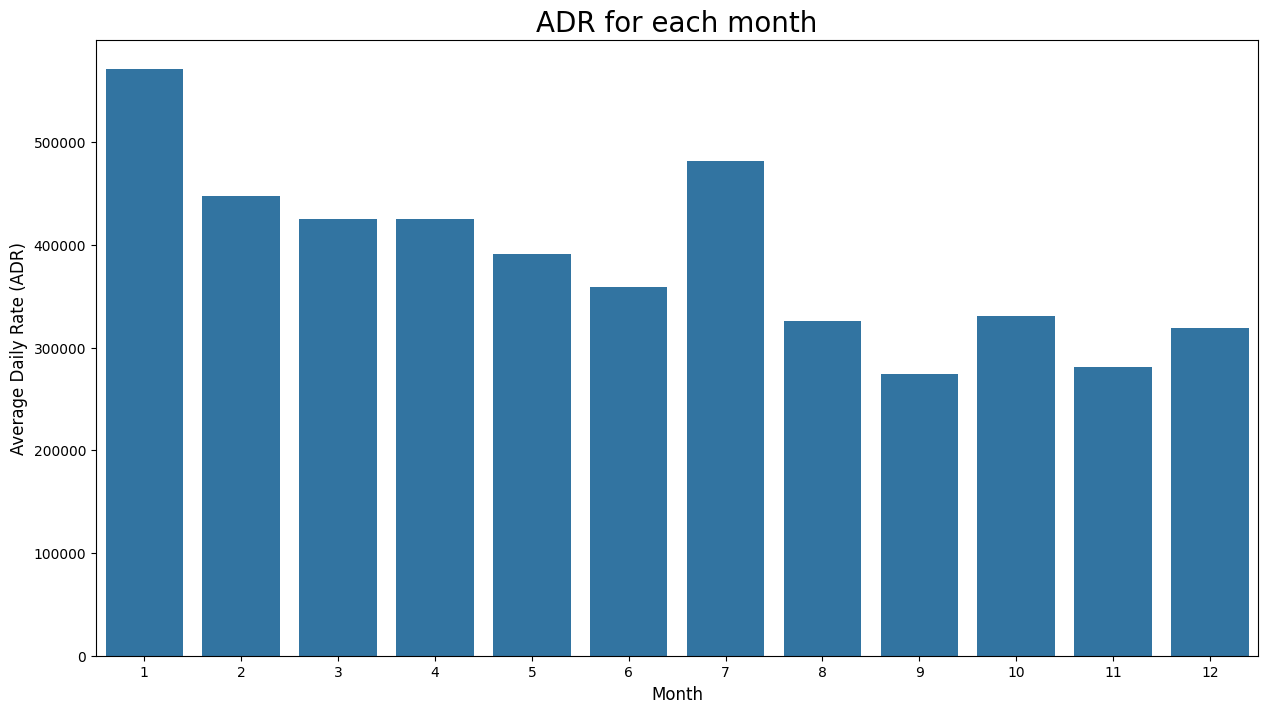

In [27]:
plt.figure(figsize=(15,8))
plt.title('ADR for each month',fontsize=20)
sns.barplot(x='month',y='adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month',size=12)
plt.ylabel('Average Daily Rate (ADR)',size=12)
plt.show()

In [28]:
cancelled_data = df[df['is_canceled'] == 1]
not_cancelled_data = df[df['is_canceled'] == 0]

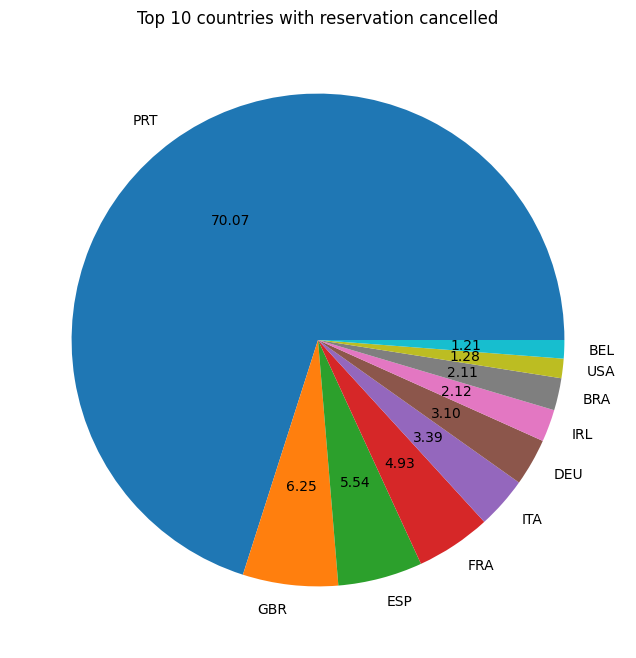

In [29]:
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

In [30]:
#finding out where most cusomters are coming from
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [31]:
#finding percentage of bookings through various market segment
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [32]:
# finding cancellation percentage from customers booking through various market segment
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

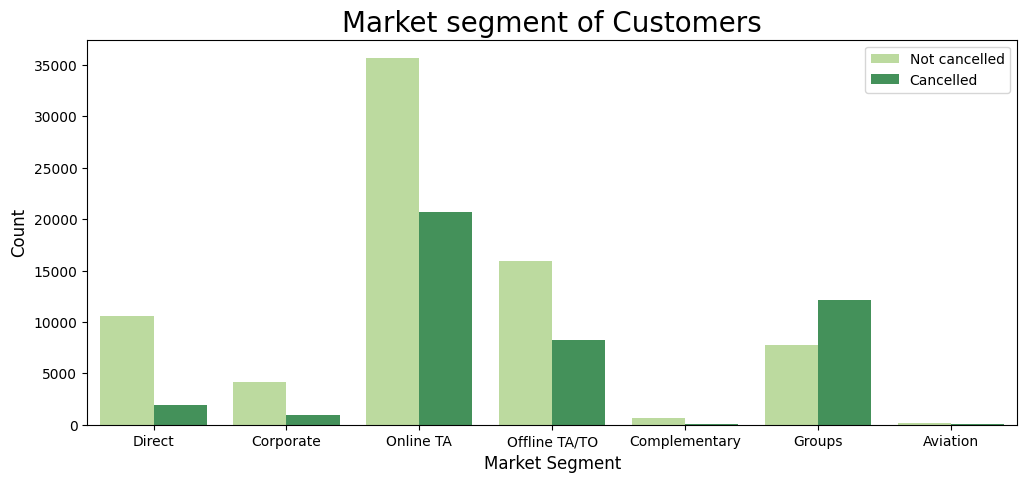

In [33]:
plt.figure(figsize = (12,5))
ax1 = sns.countplot(data = df, x='market_segment', hue='is_canceled', palette ='YlGn')
plt.legend(['Not cancelled','Cancelled'])
plt.title('Market segment of Customers',size=20)
plt.xlabel('Market Segment',size=12)
plt.ylabel('Count',size=12)
plt.show()

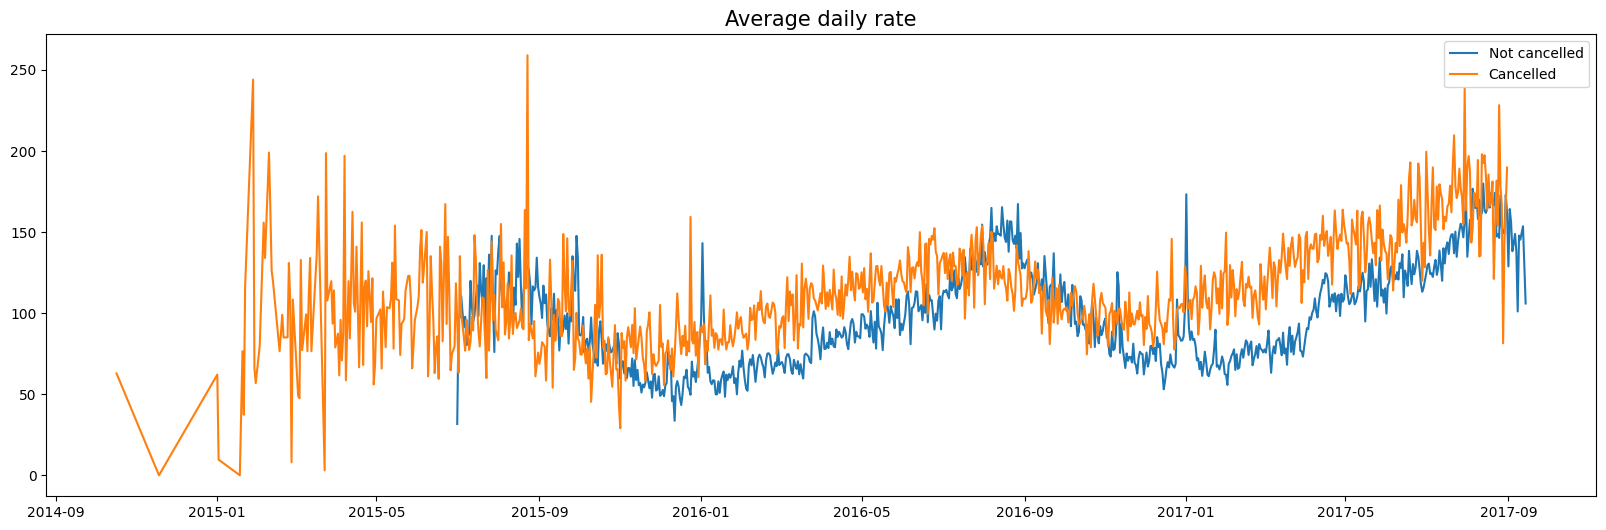

In [34]:
#plotting Average daily rate
can_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
can_adr.reset_index(inplace= True)
can_adr.sort_values('reservation_status_date', inplace=True)

not_can_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_can_adr.reset_index(inplace= True)
not_can_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (20,6))
plt.title('Average daily rate',size=15)
plt.plot('reservation_status_date', 'adr' , data = not_can_adr, label ='Not cancelled')
plt.plot('reservation_status_date', 'adr' , data = can_adr, label ='Cancelled')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

In [35]:
#As you can see in the above graph data is not consistent of 2015 year 
#so plotting only center area of the graph which seems consistent to get a better unstanding of ADR.
not_can_adr = not_can_adr[(not_can_adr['reservation_status_date']>'2016') & (not_can_adr['reservation_status_date']<'2017-09')]
can_adr = can_adr[(can_adr['reservation_status_date']>'2016') & (can_adr['reservation_status_date']<'2017-09')]

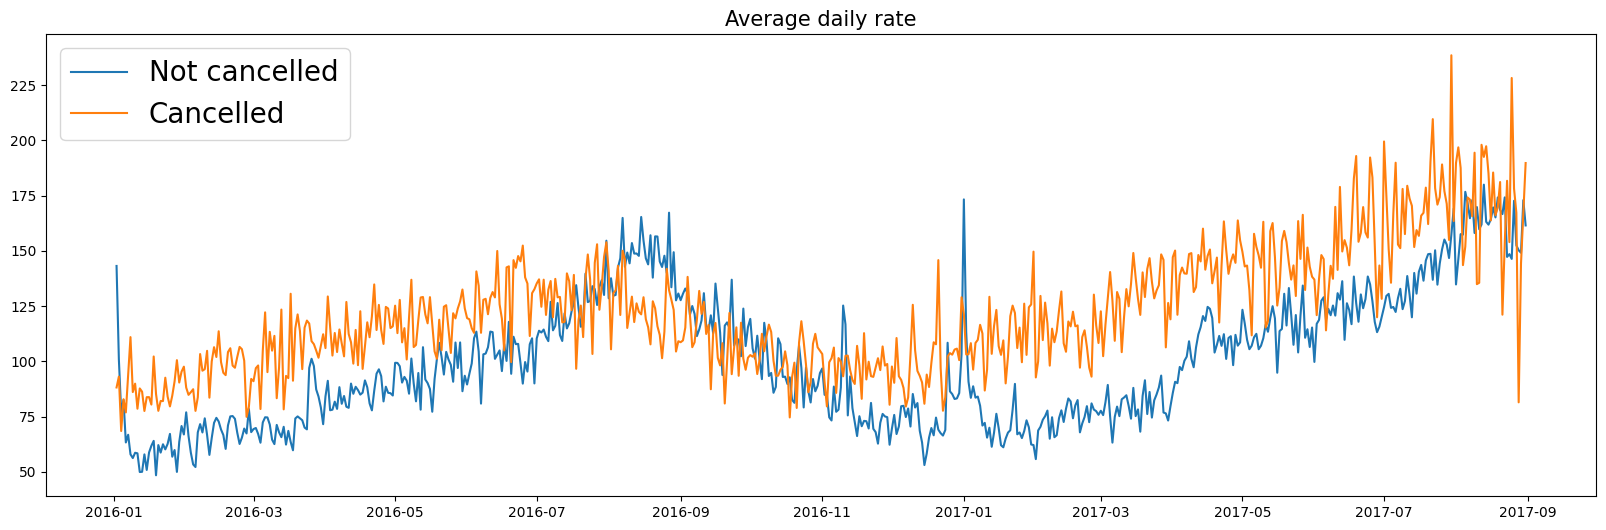

In [36]:
plt.figure(figsize = (20,6))
plt.title('Average daily rate',size=15)
plt.plot('reservation_status_date', 'adr' , data = not_can_adr, label ='Not cancelled')
plt.plot('reservation_status_date', 'adr' , data = can_adr, label ='Cancelled')
plt.legend(['Not cancelled','Cancelled'],fontsize = 20)
plt.show()

# Refer to the report for a comprehensive analysis based on the insights we've gathered